In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
class KNN:

    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))
    
    def most_frequent(self, List): 
        return max(set(List), key = List.count) 

    def predict(self, X):
        y_pred = []
        for x in X:
            distances = [self.distance(x, x_train) for x_train in self.X_train]
            k_idx = np.argsort(distances)[:self.k]
            k_neighbor_labels = [self.y_train[i] for i in k_idx]  
            most_common = self.most_frequent(k_neighbor_labels)
            y_pred.append(most_common)
        return np.array(y_pred)

(455, 30)


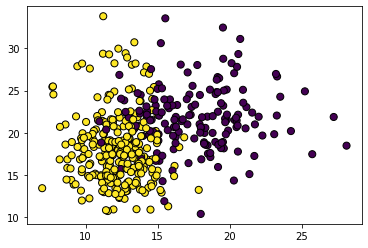

KNN classification accuracy for K: 1 is 0.9122807017543859
KNN classification accuracy for K: 2 is 0.9210526315789473
KNN classification accuracy for K: 3 is 0.9473684210526315
KNN classification accuracy for K: 4 is 0.9298245614035088
KNN classification accuracy for K: 5 is 0.9298245614035088
KNN classification accuracy for K: 6 is 0.9298245614035088
KNN classification accuracy for K: 7 is 0.9298245614035088
KNN classification accuracy for K: 8 is 0.9298245614035088
KNN classification accuracy for K: 9 is 0.9298245614035088
KNN classification accuracy for K: 10 is 0.9298245614035088
KNN classification accuracy for K: 11 is 0.9298245614035088
KNN classification accuracy for K: 12 is 0.9298245614035088
KNN classification accuracy for K: 13 is 0.9298245614035088
KNN classification accuracy for K: 14 is 0.9298245614035088
KNN classification accuracy for K: 15 is 0.9210526315789473
KNN classification accuracy for K: 16 is 0.9298245614035088
KNN classification accuracy for K: 17 is 0.921052

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = (y_true == y_pred).mean()
    return accuracy


cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Inspect data

print(X_train.shape)

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=50)
plt.show()


clf = KNN()
for k in range(1, 25):
    clf.k = k
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = y_test == y_pred
    print("KNN classification accuracy for K: {} is {}".format(k, acc.mean()))